In [113]:
# CSE 404 Introduction to Machine Learning (Fall 2023)
# Homework 2 
#
# Perceptron Learning Algorithm (PLA)
# Linear Regression

In [114]:
# Import all the things
import time
import numpy as np                    #vectors, matrices, linear algebra...
from random import choice             #randomly select item from list
from sklearn.utils import shuffle     # shuffle randomly reorders the values
import matplotlib.pyplot as plt       #plots/graphs

In [263]:
# For Perceptron
# Trains a perceptron model given a training dataset
# @training_data :: List of data points, 
#                   where training_data[0] contains data points
#                   & training_data[1] contains labels {-1, +1}
# Returns: Learned model vector

def train_perceptron(training_data):
    X = training_data[0]     # dataset
    y = training_data[1]     # labels
    model_size = X.shape[1]  # num columns; X.shape[0] --> # rows
    w = np.zeros(model_size) # zeroed column vector, size of model
                             # Random init: np.random.rand(model_size)
    
    iteration = 1
    # while True, do PLA steps
    while iteration < 1000:
        # compute results according to the hypothesis

        y_hat = np.sign(np.dot(X, w)) 
        
        # get incorrect predictions (can use the indices)
        misclassified = np.where(np.sign(y).T != y_hat)[1] #where there is a mismatch
        #print(misclassified)
         

        # Check the convergence criteria (if there are no misclassified points, the PLA is converged and we can stop)
        if misclassified.size == 0:
            break
        
        # Pick one misclassified example (x*,y*)
        x_star = X[misclassified[0]]
        y_star = y[misclassified[0]]
         

        # Update the weight vector with perceptron update rule
        w = w + x_star*y_star # w_t+1 = w_t + x* * y*
        

        iteration += 1

    return w, iteration     # return weight vector (model)

In [264]:
# For Perceptron
# Print the predictions given a dataset & learned model
# @model :: model (weight) vector
# @data :: data points
# Returns: none

def print_prediction(model,data):
    result = np.matmul(data,model)
    predictions = np.sign(result)
    for i in range(len(data)):
        print("{}: {} -> {}".format(data[i][:2], result[i], predictions[i]))    

In [265]:
# For Linear Regression
# Randomly split the dataset into training & testing sets
# @train_perc :: Percentage (in decimal format) of data to use for training
#                Example: if train_perc == 0.7 --> 70% training, 30% testing
# @data :: features
# @label :: targets
# Returns training data, testing data, training labels, testing labels

def rand_split_train_test(data, label, train_perc):
    if train_perc >= 1 or train_perc <= 0:
        raise Exception('train_perc should be between (0,1).')
    sample_size = data.shape[0]     # num rows 
    if sample_size < 2:
        raise Exception('Sample size should be larger than 1. ')

    num_train_sample = np.max([np.floor(sample_size * train_perc).astype(int), 1])
    data, label = shuffle(data, label)

    data_tr = data[:num_train_sample]     
    data_te = data[num_train_sample:]     

    label_tr = label[:num_train_sample]     
    label_te = label[num_train_sample:]     

    return data_tr, data_te, label_tr, label_te

In [266]:
# For Linear Regression
# Takes a subsample of the entire dataset
# Takes subsample_size chunk of X & y within bounds

def subsample_data(data, label, subsample_size):
    # protected sample size
    subsample_size = np.max([1, np.min([data.shape[0], subsample_size])])
    data, label = shuffle(data, label)
    data = data[:subsample_size]
    label = label[:subsample_size]
    return data, label

In [300]:
# For Linear Regression
# Generates a random dataset with dimensions based on feature_size & sample_size
# @feature_size == x_i # columns
# @sample_size == # rows
# @bias :: True --> add Gaussian noise

def generate_rnd_data(feature_size, sample_size, bias=False):
    # Generate X matrix
    data = np.concatenate((np.random.randn(sample_size, feature_size), np.ones((sample_size, 1))), axis=1) \
        if bias else np.random.randn(sample_size, feature_size)  # the first dimension is sample_size (n X d)

    # Generate ground truth model
    # If bias == T: then #rows + 1
    truth_model = np.random.randn(feature_size + 1, 1) * 10 \
        if bias else np.random.randn(feature_size, 1) * 10

    # Generate labels
    label = np.dot(data, truth_model)

    # Add element-wise Gaussian noise to each label
    label += np.random.randn(sample_size, 1)
    return data, label, truth_model

In [287]:
# For Linear Regression
# Sine Function :)

def sine_data(sample_size, order_M, plot_data = False, noise_level = 0.1, bias = False):
    if int(order_M) != order_M: 
        raise Exception('order_M should be an integer.')
    if order_M < 0:
        raise Exception('order_M should be at least larger than 0.')
    
    # Generate X matrix
    x = np.random.rand(sample_size,1) * 2 * np.pi        # generate x from 0 to 2pi
    X = np.column_stack([ x**m for m in range(order_M)])

    data = np.concatenate((X, np.ones((sample_size, 1))), axis=1) if bias else X

    # Ground truth model: a sine function
    f = lambda x: np.sin(x)

    # Generate labels
    label = f(x)

    # Add element-wise Gaussian noise to each label
    label += np.random.randn(sample_size, 1)*noise_level

    if plot_data:
        plt.figure()
        xx = np.arange(0, np.pi * 2, 0.001)
        yy = f(xx)
        plt.plot(xx, yy, linestyle = '-', color = 'g', label = 'Objective Value')
        plt.scatter(x, label, color = 'b', marker = 'o', alpha = 0.3)
        plt.xlabel("t")
        plt.ylabel("x")
        plt.title("Sine Data (N = %d) with Noise Level %.4g.".format(sample_size, noise_level))
        plt.show()

    return data, label, f

In [288]:
# For Linear Regression
# Compute the mean square error (MSE) between the true and predicted labels
# @true_label :: y --> Nx1 vector
# @predicted_label :: y^ --> Nx1 vector
# Returns :: scalar MSE value

def mean_squared_error(true_label, predicted_label):
    rmse = np.mean((true_label - predicted_label)**2)**0.5
    return rmse

In [289]:
# For Linear Regression
# Compute the model vector obtained after MLE
# w_star = (X^T X)^(-1)X^T t
# @feature :: Nx(d+1) matrix
# @target :: Nx1 vector
# Returns :: w_star --> (d+1)x1 model vector

def least_squares(feature, target):
    w_star = np.dot(np.dot(np.linalg.inv(np.dot(feature.T, feature)), feature.T), target)
    return w_star

In [290]:
# For Linear Regression
# Compute the model vector when using L2-norm regularization
# w_star = (X^T X + LI)^(-1) X^T t
# @feature :: Nx(d+1) matrix
# @target :: Nx1 vector
# @lam :: scalar regularization parameter, lambda
# Returns :: w_star --> (d+1)x1 model vector

def ridge_regression(feature, target, lam = 1e-17):
    w_star = np.dot(np.dot(np.linalg.inv(np.dot(feature.T, feature) + lam * np.eye(feature.shape[1])), feature.T), target)
    return w_star

In [291]:
# # For Linear Regression
# # k-fold Cross Validation

# def k_fold_cross_validation(current_fold, total_fold, total_sample_size):
#     # Find where we are
#     folds_length = total_sample_size//len(total_fold)
#     curr_start = folds_length*current_fold
#     curr_end = curr_start+folds_length

#     # Find the indices
#     test_indices = np.arange(curr_start, curr_end)
#     train_indices = np.concatenate((np.arange(0, curr_start), np.arange(curr_end, total_sample_size)))

#     data_train = data[train_indices]
#     data_test = data[test_indices]
#     label_train = label[train_indices]
#     label_test = label[test_indices]


#     return data_train, data_test, label_train, label_test

In [292]:
# # MAIN 

# if __name__ == '__main__':

#     # PERCEPTRON MAIN #########################################
#     rnd_x = np.array([[0, 1, 1], \
#                       [0.6, 0.6, 1], \
#                       [1, 0, 1], \
#                       [1, 1, 1], \
#                       [0.3, 0.4, 1], \
#                       [0.2, 0.3, 1], \
#                       [0.1, 0.4, 1], \
#                       [0.5, -0.1, 1]])

#     rnd_y = np.array([1, 1, 1, 1, -1, -1, -1, -1])
#     rnd_data = [rnd_x, rnd_y]

#     trained_model = train_perceptron(rnd_data)
#     print("Model:", trained_model)
#     print_prediction(trained_model, rnd_x)
#     ###########################################################
#     # LINEAR REGRESSION MAIN (TODO)
#     #
#     # plt.interactive(False)
#     # np.random.seed(404)

#     # Complete Least Squares, Ridge Regression, MSE functions
#     # Randomly generate & plot 30 data points using sine function
#     # Randomly split the dataset
#     # For each lambda, use Ridge Regression to calculate & plot MSE for training & testing sets
#     # Implement k-fold CV & choose best lambda 
    

Model: [-7.36959582 -7.78309663 -1.76645938]
Steps: 57


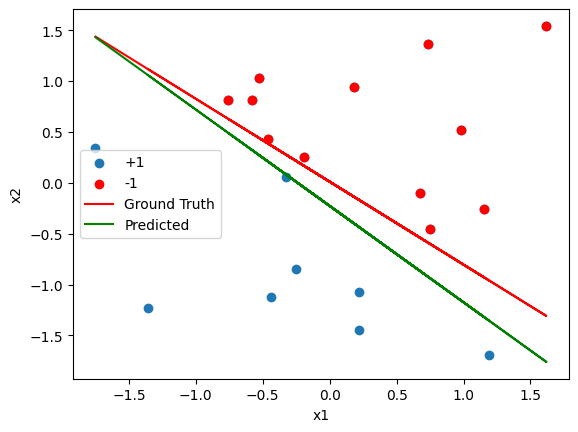

In [301]:
# TODO :: Add functions above to solve Q2 (Problem 1.4 (a-e) in LFD) 

# Q2 part a
np.random.seed(100)  # set seed
data, label, truth_model = generate_rnd_data(2,20,True)
x1 = data[:,0]
x2 = data[:,1]
plt.scatter(x1,x2,label="+1")
plt.scatter(x1[(label<0).flatten()], x2[(label<0).flatten()], label = "-1", c="r")

#found by solving line equation
slope = -(truth_model[2]/truth_model[1])/(truth_model[2]/truth_model[0]) 
intercept = -truth_model[2]/truth_model[1]
plt.plot(x1, slope*x1 + intercept, label = "Ground Truth", c="r")
plt.xlabel("x1")
plt.ylabel("x2")

# Q2 part b
weights, iterations = train_perceptron([data,label])
print("Model:", weights)
print("Steps:", iterations)

predict_slope = -(weights[2]/weights[1])/(weights[2]/weights[0])
predict_intercept = -weights[2]/weights[1]
plt.plot(x1, predict_slope*x1 + predict_intercept, label = "Predicted", c="g")
plt.legend()

Model: [24.19664599 87.43516301 48.4824947 ]
Steps: 31


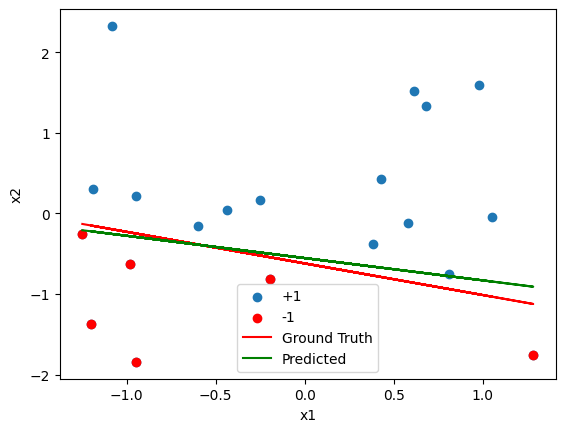

In [308]:
# TODO :: Add functions above to solve Q2 (Problem 1.4 (a-e) in LFD) 

# Q2 part c
np.random.seed(103)  # set seed
data, label, truth_model = generate_rnd_data(2,20,True)
x1 = data[:,0]
x2 = data[:,1]
plt.scatter(x1,x2,label="+1")
plt.scatter(x1[(label<0).flatten()], x2[(label<0).flatten()], label = "-1", c="r")

#found by solving line equation
slope = -(truth_model[2]/truth_model[1])/(truth_model[2]/truth_model[0]) 
intercept = -truth_model[2]/truth_model[1]
plt.plot(x1, slope*x1 + intercept, label = "Ground Truth", c="r")
plt.xlabel("x1")
plt.ylabel("x2")

weights, iterations = train_perceptron([data,label])
print("Model:", weights)
print("Steps:", iterations)

predict_slope = -(weights[2]/weights[1])/(weights[2]/weights[0])
predict_intercept = -weights[2]/weights[1]
plt.plot(x1, predict_slope*x1 + predict_intercept, label = "Predicted", c="g")
plt.legend()

Model: [15.10368235  8.04577982  2.73243486]
Steps: 12


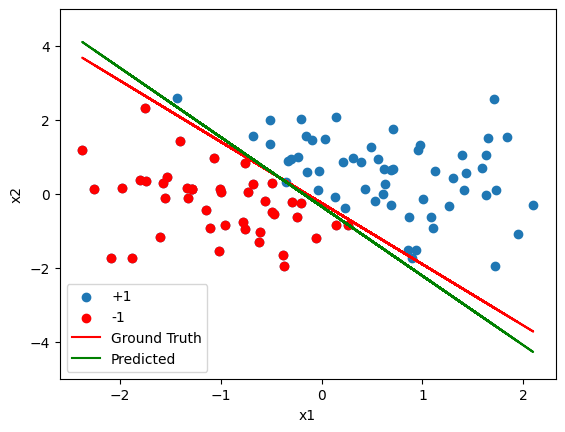

In [311]:
# TODO :: Add functions above to solve Q2 (Problem 1.4 (a-e) in LFD) 

# Q2 part d
np.random.seed(105)  # set seed
data, label, truth_model = generate_rnd_data(2,100,True)
x1 = data[:,0]
x2 = data[:,1]
plt.scatter(x1,x2,label="+1")
plt.scatter(x1[(label<0).flatten()], x2[(label<0).flatten()], label = "-1", c="r")

#found by solving line equation
slope = -(truth_model[2]/truth_model[1])/(truth_model[2]/truth_model[0]) 
intercept = -truth_model[2]/truth_model[1]
plt.plot(x1, slope*x1 + intercept, label = "Ground Truth", c="r")
plt.xlabel("x1")
plt.ylabel("x2")

weights, iterations = train_perceptron([data,label])
print("Model:", weights)
print("Steps:", iterations)

predict_slope = -(weights[2]/weights[1])/(weights[2]/weights[0])
predict_intercept = -weights[2]/weights[1]
plt.plot(x1, predict_slope*x1 + predict_intercept, label = "Predicted", c="g")
plt.ylim(-5,5)
plt.legend()

Model: [ 37.87961151 -26.08419949   1.56580155]
Steps: 1000


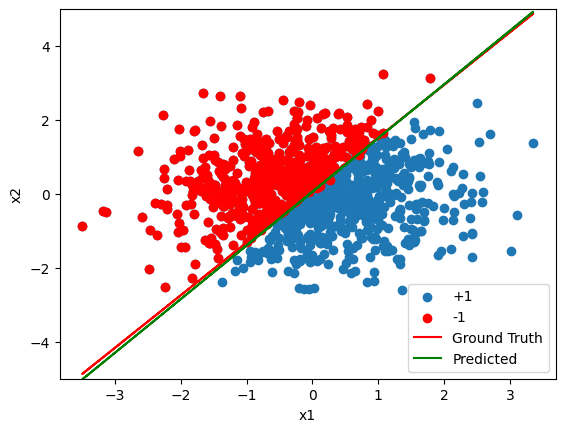

In [314]:
# TODO :: Add functions above to solve Q2 (Problem 1.4 (a-e) in LFD) 

# Q2 part d
np.random.seed(103)  # set seed
data, label, truth_model = generate_rnd_data(2,1000,True)
x1 = data[:,0]
x2 = data[:,1]
plt.scatter(x1,x2,label="+1")
plt.scatter(x1[(label<0).flatten()], x2[(label<0).flatten()], label = "-1", c="r")

#found by solving line equation
slope = -(truth_model[2]/truth_model[1])/(truth_model[2]/truth_model[0]) 
intercept = -truth_model[2]/truth_model[1]
plt.plot(x1, slope*x1 + intercept, label = "Ground Truth", c="r")
plt.xlabel("x1")
plt.ylabel("x2")

weights, iterations = train_perceptron([data,label])
print("Model:", weights)
print("Steps:", iterations)

predict_slope = -(weights[2]/weights[1])/(weights[2]/weights[0])
predict_intercept = -weights[2]/weights[1]
plt.plot(x1, predict_slope*x1 + predict_intercept, label = "Predicted", c="g")
plt.ylim(-5,5)
plt.legend()